In [1]:
import pandas as pd

# Read data
reviews = pd.read_csv('reviewRotterdam.csv', encoding ='latin-1', header=None, names=['Rating','Review_Text'])

# Remove missing values
reviews = reviews.dropna()

reviews.head()

,Rating,Review_Text
0,0,Benteng sejarah dari jaman belanda . Letaknya ...
1,1,spot favourite kalau ada tamu dari luar makass...
2,2,Salah satu peninggalan masa penjajahan belanda...
3,3,Benteng Rotterdam merupakan salah satu peningg...
4,4,Liburan tidak perlu jauh-jauh di kota Makassar...


In [2]:
# Filter only related columns and drop duplicated reviews
reviews = reviews[["Review_Text"]]
#reviews = reviews.iloc[]
reviews

,Review_Text
0,Benteng sejarah dari jaman belanda . Letaknya ...
1,spot favourite kalau ada tamu dari luar makass...
2,Salah satu peninggalan masa penjajahan belanda...
3,Benteng Rotterdam merupakan salah satu peningg...
4,Liburan tidak perlu jauh-jauh di kota Makassar...
...,...
674,"Museum di fort adalah allright, tetapi fort it..."
675,Fort rotterdam adalah sangat baik diawetkan si...
676,jika anda memiliki beberapa jam untuk cadangan...
677,"Itu; s bukan museum terbaik di dunia, bahkan a..."


In [3]:
import nltk
import contractions
import re
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Data Cleaning and Preprocessing
def text_preprocessing(text):
    
    # Convert words to lower case (Lowercase each word)
    text = text.lower();

    # Replace contradictions with longer forms
#     if True :
#         text = text.split()
#         new_text = []
#         for word in text :
#             new_text.append(contractions.fix(word))
# #             if word in contractions:
# #                 new_text.append(contractions[word])
# #             else:
# #                 new_text.append(word)
#         text = " ".join(new_text)
        
    # Remove special characters and unwanted words
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)
    text = re.sub(r'[0-9]',' ', text)
    
    #Stemming
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    
    text = stemmer.stem(text)
    
    # Tokenize
    text = nltk.WordPunctTokenizer().tokenize(text)
    
    # Lemmatize (restore words to their dictionary forms so all 
    # words with similiar meanings will be linked to one words)
    #text = [nltk.stem.WordNetLemmatizer().lemmatize(token, pos='v') for token in text if len(token)>1]
    
    
    # Stopwords removal
    stop_words = set(stopwords.words('indonesian'))
    text_final = []
    for word in text:
        if word not in stop_words :
            text_final.append(word)
    return text_final

def to_string(text):
    # Convert list to string
    text = ' '.join(map(str, text))
    
    return text

# Create a list of review by applying text_preprocessing function
reviews['Review_Clean_List'] = list(map(text_preprocessing, reviews.Review_Text))

# Return to string with to_string function
reviews['Review_Clean'] = list(map(to_string, reviews['Review_Clean_List']))
#reviews
reviews.to_csv('out.csv')

/home/izmy/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


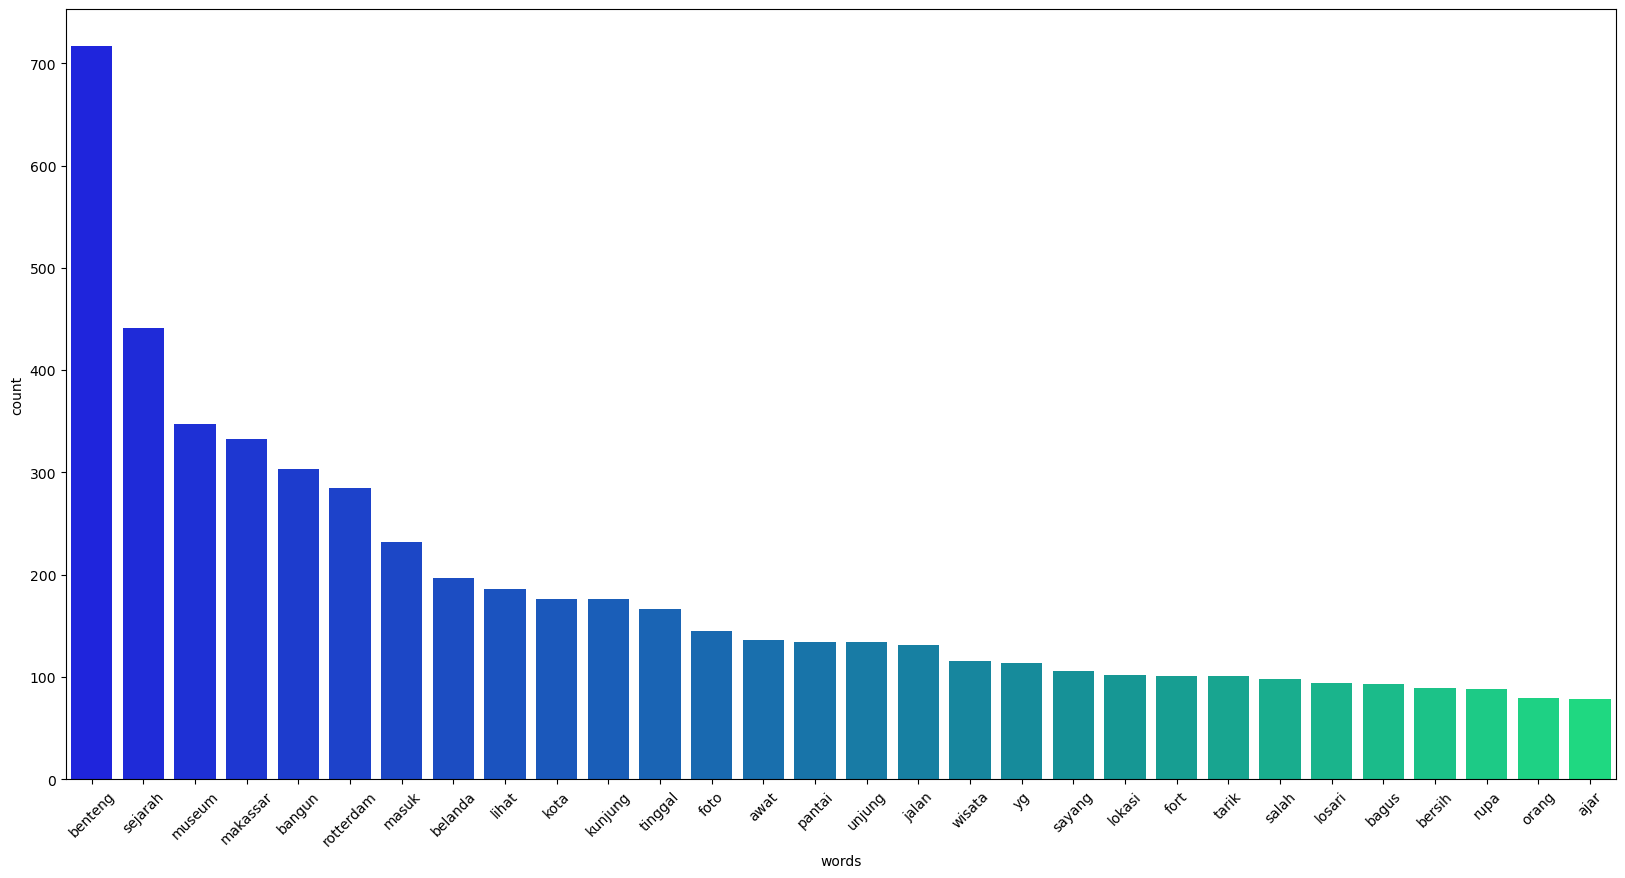

In [4]:
# Count words
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Join all word corpus
review_words = ','.join(list(reviews['Review_Clean'].values))

# Count and find the 30 most frequent
Counter = Counter(review_words.split())
most_frequent = Counter.most_common(30)

# Bar plot of frequent words
fig = plt.figure(1, figsize=(20,10))
data = pd.DataFrame(most_frequent, columns=("words","count"))
sns.barplot(x = 'words', y='count', data = data, palette = 'winter')
plt.xticks(rotation=45)
plt.show()

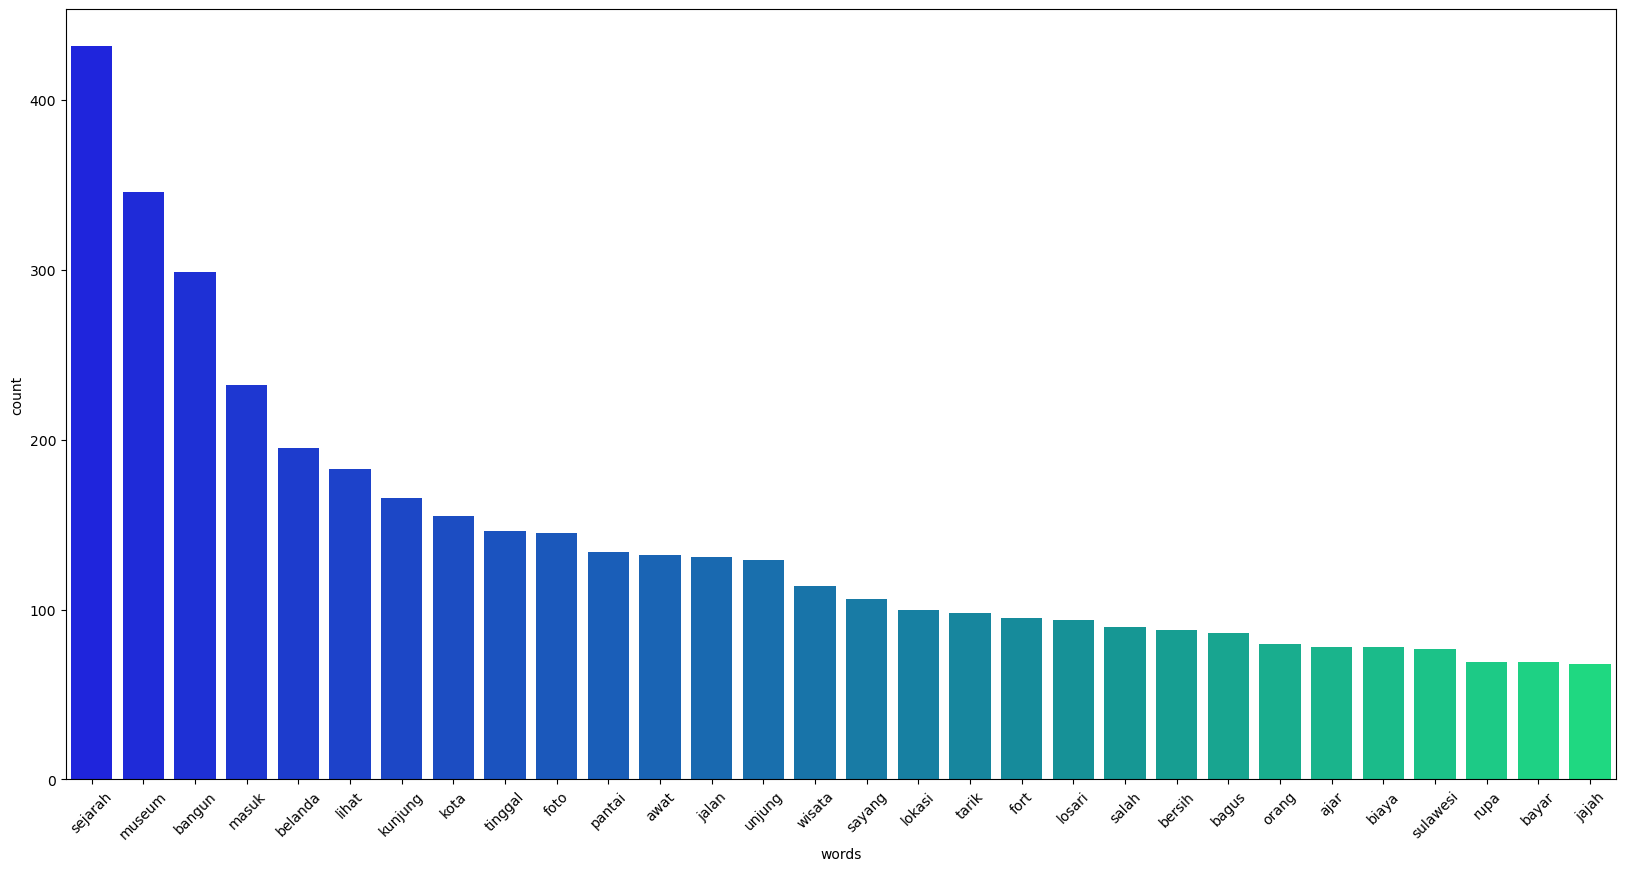

In [5]:
from collections import Counter
#nltk.download('stopwords')

stopwords_list = stopwords.words('indonesian')
stopwords_list.extend(['benteng', 'rotterdam', 'makassar', 'nya', 'yg'])

reviews['Review_Clean_List'] = [[word for word in line if word not in stopwords_list] for line in reviews['Review_Clean_List']]
reviews['Review_Clean'] = list(map(to_string, reviews['Review_Clean_List']))

# Join all words corpus
review_words = ','.join(list(reviews['Review_Clean'].values))

# Count and find the 30 most frequnet 
Counter = Counter(review_words.split())
most_frequent = Counter.most_common(30)

# Bar plot of frequent words
fig = plt.figure(1, figsize=(20,10))
data = pd.DataFrame(most_frequent, columns=("words","count"))
sns.barplot(x = 'words', y='count', data = data, palette = 'winter')
plt.xticks(rotation=45)
plt.show()

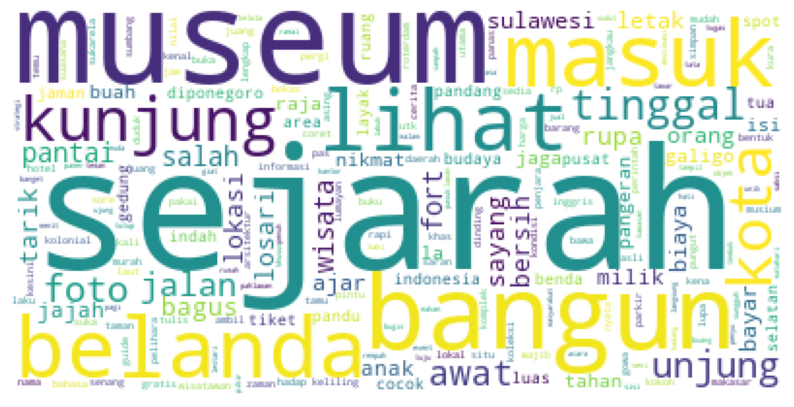

In [6]:
from wordcloud import WordCloud

# Generate the word cloud
wordcloud = WordCloud(background_color="white",
                      max_words= 200,
                      contour_width = 8,
                      contour_color = "steelblue",
                      collocations=False).generate(review_words)
                      
# Visualize the word cloud
fig = plt.figure(1, figsize = (10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

### Bag of Words

In [7]:
import gensim

# Create Dictionary
id2word = gensim.corpora.Dictionary(reviews['Review_Clean_List'])

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in reviews['Review_Clean_List']]

/home/izmy/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


### Menentukan jumlah topik

   number_of_topics  coherence_score
0                 1         0.352593
1                 2         0.365903
2                 3         0.368420
3                 4         0.376248
4                 5         0.377378
5                 6         0.397836
6                 7         0.380960
7                 8         0.382296
8                 9         0.398650


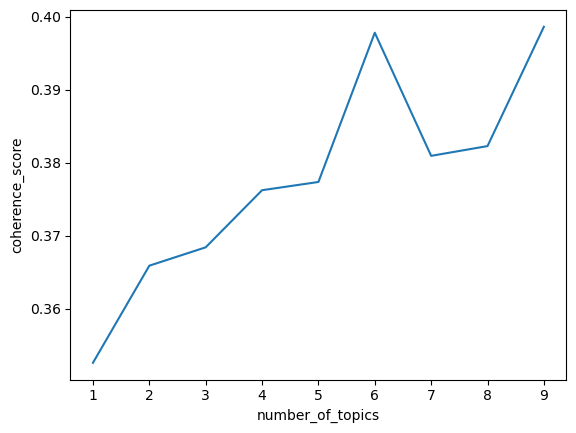

In [8]:
# Topic coherence score
from gensim.models import CoherenceModel

# Compute coherence score
number_of_topics = []
coherence_score = []
for i in range(1,10):
  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           iterations=50,
                                           num_topics=i)
  coherence_model_lda = CoherenceModel(model=lda_model, 
                                       texts=reviews['Review_Clean_List'], 
                                       dictionary=id2word, 
                                       coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  number_of_topics.append(i)
  coherence_score.append(coherence_lda)

# Create a dataframe of coherence score by number of topics 
topic_coherence = pd.DataFrame({'number_of_topics':number_of_topics,
                                'coherence_score':coherence_score})

print(topic_coherence)
# Print a line plot
sns.lineplot(data=topic_coherence, x='number_of_topics', y='coherence_score')
plt.show()

### Topic Modeling menggunakan LDA

In [9]:
# Define the number of topics 
n_topics = 6

# Run the LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=n_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} Word: {}".format(idx, topic))

Topic: 0 Word: 0.074*"hotel" + 0.050*"pantai" + 0.043*"jam" + 0.041*"sisi" + 0.032*"losari" + 0.027*"pusat" + 0.020*"malam" + 0.019*"bugis" + 0.018*"toko" + 0.017*"kaki"
Topic: 1 Word: 0.078*"bahasa" + 0.071*"inggris" + 0.032*"dinding" + 0.026*"menit" + 0.026*"pikir" + 0.024*"ambil" + 0.019*"coba" + 0.016*"alam" + 0.015*"kamar" + 0.015*"bicara"
Topic: 2 Word: 0.074*"unjung" + 0.058*"sejarah" + 0.051*"tarik" + 0.043*"kunjung" + 0.035*"museum" + 0.029*"pergi" + 0.028*"bersih" + 0.028*"foto" + 0.026*"awat" + 0.024*"bangun"
Topic: 3 Word: 0.104*"lihat" + 0.050*"layak" + 0.048*"buah" + 0.026*"bangun" + 0.023*"museum" + 0.022*"belanda" + 0.021*"kolonial" + 0.018*"tampil" + 0.017*"ambil" + 0.014*"diponegoro"
Topic: 4 Word: 0.047*"sejarah" + 0.044*"jalan" + 0.041*"orang" + 0.037*"fort" + 0.037*"milik" + 0.031*"museum" + 0.031*"bangun" + 0.031*"bagus" + 0.026*"temu" + 0.021*"kota"
Topic: 5 Word: 0.089*"masuk" + 0.067*"museum" + 0.043*"biaya" + 0.034*"bayar" + 0.027*"tiket" + 0.024*"galigo" + 0.

In [15]:
top_words_per_topic = []
for t in range(lda_model.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in lda_model.show_topic(t, topn = 20)])
df = pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word','P']).to_csv("top_words2.csv")
print(df)

None


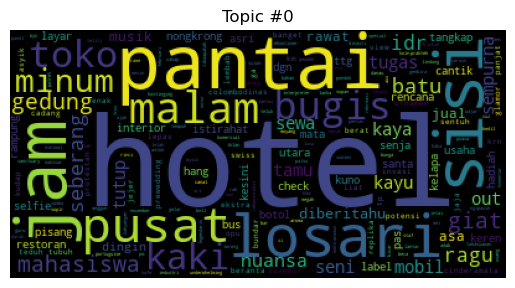

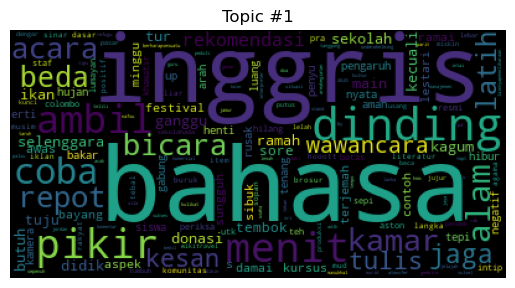

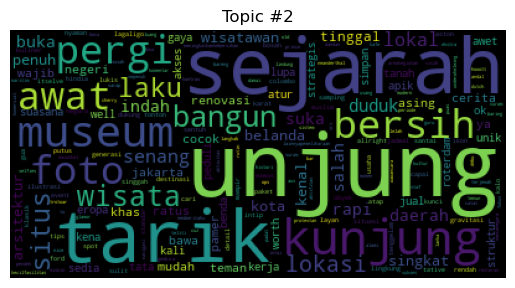

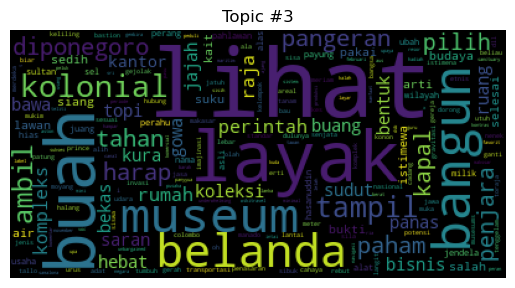

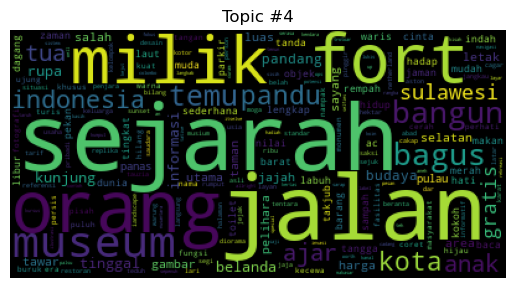

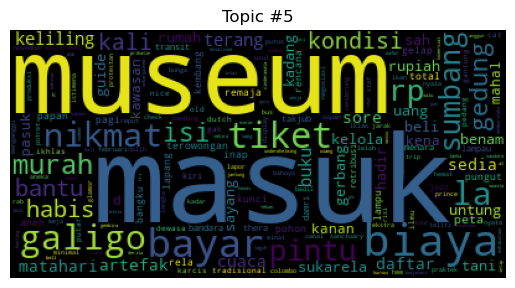

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

for t in range(lda_model.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

In [13]:
# Simpan model
#from gensim.test.utils import datapath

#saving model to disk.
#temp_file = datapath("lda_model_riset1")
#lda_model.save("lda_model_riset1.gensim")

#loading model from disk
#from gensim import  models
#lda_model = models.ldamodel.LdaModel.load("lda_model_riset1.gensim")

In [14]:
# import and enable notebook to run visualization
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim_models.prepare(lda_model,
                                    corpus,
                                    dictionary=lda_model.id2word)
vis

/home/izmy/anaconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.249913  0.035291       1        1  27.794500
2      0.195519 -0.081490       2        1  22.160507
3      0.007799  0.185687       3        1  16.375032
5     -0.103596 -0.243914       4        1  14.778082
0     -0.164553 -0.013447       5        1  10.262207
1     -0.185082  0.117874       6        1   8.629672, topic_info=            Term        Freq       Total Category  logprob  loglift
62         lihat  267.000000  267.000000  Default  30.0000  30.0000
5          masuk  205.000000  205.000000  Default  29.0000  29.0000
165       unjung  256.000000  256.000000  Default  28.0000  28.0000
8        sejarah  404.000000  404.000000  Default  27.0000  27.0000
216        hotel  119.000000  119.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
1800  selenggara   10.839980   12.375847   Topic6  -4.8259   2.3175
1887       repot   19.189131   23.166749   Topic6  -4.2548   2.2616
1985   wawancara   12.885866   15.800053   Topic6  -4.6530   2.2461
874        ambil   32.100337   75.921502   Topic6  -3.7403   1.5891
1652        ikan    9.593855   13.342459   Topic6  -4.9480   2.1201

[253 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
498       6  0.937959      acara
12        1  0.992510       ajar
1364      6  0.956837       alam
874       3  0.566374      ambil
874       6  0.421488      ambil
...     ...       ...        ...
1985      2  0.063291  wawancara
1985      6  0.822782  wawancara
52        2  0.991671     wisata
72        2  0.984982  wisatawan
105       2  0.925925         ya

[249 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 4, 6, 1, 2])

/home/izmy/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/izmy/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/izmy/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/izmy/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={n